In [1]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# ^^ Just another way to write the two limits

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-46.2504203456276 -157.48544092588526
-76.44656488922689 -118.61284883524313
55.06455222146485 -79.87604973600374
38.082672625948334 119.79024151488846
0.5753875746862605 -10.356359175972756
-36.369806848186215 -105.38988344796611
4.532141129517143 76.38611712472408
38.3699737341922 -42.98851780969949
-9.76179622995464 -54.86640727893506
24.710661520476947 28.593652353968594
-76.85984349116815 43.50783963626009
5.378972537341497 -176.54654203249146
-15.93819774815043 112.57639356058701
-68.09777891839921 -87.52081378628758
-43.12518228922876 50.478258042346994
24.297041434469193 129.02362481563938
-38.47648825971173 120.95903258285773
-0.41268309958502414 67.26879067523461
-15.865020505925074 149.21234126273288
-61.32886652764563 43.16971605850313
-51.22182110350562 171.00437842612098
-27.926790346218944 -153.38077261662727
82.2816976867494 -111.73427836572864
-0.944981136893233 8.178474525640269
67.75461150436013 144.18686555929122
58.00094800328705 -127.73682712683816
-3.042694650834

-47.81382861626794 31.861446760387906
56.61411166966312 -94.39129762133449
-0.6517182496879315 173.51547051958136
68.02466568979679 -104.15772594058302
-13.202660216419673 82.91657796030535
-75.0225942413552 56.873822224410475
76.04850011631578 90.51152551957131
32.72755638072182 43.6180323730388
61.868084770797935 -144.2631911915928
-13.225155743150864 79.87023271266327
4.540848955800882 -125.12261465607071
45.21315052184596 171.96263199733897
-85.71533621856719 -119.54031167193318
-49.33688008174279 37.410918945020825
-14.403604054805413 67.44529245515494
79.52912507908252 179.51282722188768
35.00284358761499 -140.0347687559915
-3.487071011433599 29.77648075994051
44.18408289129633 82.32599680665595
30.403347642146926 102.48850320136859
42.4188800384799 168.31671002001656
3.459282411398064 178.17802758179357
-64.69953988993431 91.51891478270193
-73.59275664570048 -29.36496667863375
-69.67809365951285 170.5840995499783
-53.302454815239344 36.01573923203617
74.11709012086808 -128.51190

In [5]:
from citipy import citipy

# Import the requests library

import requests

# Import the API kry

from config import weather_api_key
# from config import weather_api_key

# Import the time library and the datetime module from the datetime library 

import time

from datetime import datetime

# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Creat a list for holding the cities

cities = []

# Identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then add it to cities list
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count

len(cities)

625

In [7]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

# Loop through all the cities in our list

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes (due to OpenWeatherMap API allowing 60 calls per min for free tier
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        
    # Create endpoint URL with each city
    
    city_url = url + "&q=" + city.replace(" ", "+")
    
    
    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
# Run an API request for each of the cities.

    try:
        
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          
                          "Lat": city_lat,
                          
                          "Lng": city_lng,
                          
                          "Max Temp": city_max_temp,
                          
                          "Humidity": city_humidity,
                          
                          "Cloudiness": city_clouds,
                          
                          "Wind Speed": city_wind,
                          
                          "Country": city_country,
                          
                          "Date": city_date})

# If an error is experienced, skip the city.
    
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 1 | longkou
Processing Record 5 of Set 1 | harper
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | male
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | alta floresta
Processing Record 10 of Set 1 | tahta
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 13 of Set 1 | karratha
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | nishihara
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | thinadhoo
Processing Record 18 of Set 1 | innisfail
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | avera
Processing Record 21 of Set 1 | yellowknife
Pr

Processing Record 40 of Set 4 | buta
Processing Record 41 of Set 4 | kralendijk
Processing Record 42 of Set 4 | lyubytino
Processing Record 43 of Set 4 | bengkulu
Processing Record 44 of Set 4 | saint-francois
Processing Record 45 of Set 4 | namibe
Processing Record 46 of Set 4 | iqaluit
Processing Record 47 of Set 4 | faya
Processing Record 48 of Set 4 | milyutinskaya
Processing Record 49 of Set 4 | pevek
Processing Record 50 of Set 4 | hofn
Processing Record 1 of Set 5 | rundu
Processing Record 2 of Set 5 | rawson
Processing Record 3 of Set 5 | bay roberts
Processing Record 4 of Set 5 | rasht
Processing Record 5 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 5 | najran
Processing Record 7 of Set 5 | banda aceh
Processing Record 8 of Set 5 | foumban
Processing Record 9 of Set 5 | erzin
Processing Record 10 of Set 5 | saint anthony
Processing Record 11 of Set 5 | bandarbeyla
Processing Record 12 of Set 5 | dunedin
Processing Record 13 of Set 5 | padang
Pr

Processing Record 32 of Set 8 | pyapon
Processing Record 33 of Set 8 | registro
Processing Record 34 of Set 8 | dudinka
Processing Record 35 of Set 8 | mier
Processing Record 36 of Set 8 | sao pedro do sul
Processing Record 37 of Set 8 | simplicio mendes
Processing Record 38 of Set 8 | dera bugti
Processing Record 39 of Set 8 | souillac
Processing Record 40 of Set 8 | banepa
Processing Record 41 of Set 8 | kampot
Processing Record 42 of Set 8 | hanna
Processing Record 43 of Set 8 | sao filipe
Processing Record 44 of Set 8 | tuatapere
Processing Record 45 of Set 8 | ponta do sol
Processing Record 46 of Set 8 | warqla
City not found. Skipping...
Processing Record 47 of Set 8 | orlik
Processing Record 48 of Set 8 | bokspits
City not found. Skipping...
Processing Record 49 of Set 8 | kedrovyy
Processing Record 50 of Set 8 | millinocket
Processing Record 1 of Set 9 | arkhangelsk
Processing Record 2 of Set 9 | yarmouth
Processing Record 3 of Set 9 | marcona
City not found. Skipping...
Proces

Processing Record 15 of Set 12 | te anau
Processing Record 16 of Set 12 | tarauaca
Processing Record 17 of Set 12 | sergach
Processing Record 18 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 19 of Set 12 | plymouth
Processing Record 20 of Set 12 | walvis bay
Processing Record 21 of Set 12 | chase
Processing Record 22 of Set 12 | otane
Processing Record 23 of Set 12 | grindavik
Processing Record 24 of Set 12 | hay river
Processing Record 25 of Set 12 | sistranda
Processing Record 26 of Set 12 | gangotri
City not found. Skipping...
Processing Record 27 of Set 12 | cam ranh
Processing Record 28 of Set 12 | lethem
Processing Record 29 of Set 12 | pontianak
Processing Record 30 of Set 12 | iquique
Processing Record 31 of Set 12 | viedma
Processing Record 32 of Set 12 | tanabe
Processing Record 33 of Set 12 | ibirataia
Processing Record 34 of Set 12 | margate
Processing Record 35 of Set 12 | waipawa
Processing Record 36 of Set 12 | axim
Processing Record 37 of Set 12 | balykshi
Pro

In [8]:
len(city_data)

569

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-08-31 20:31:51,-46.1927,168.8643,49.39,79,49,2.37
1,Punta Arenas,CL,2022-08-31 20:29:39,-53.1500,-70.9167,46.51,71,100,8.05
2,Longkou,CN,2022-08-31 20:31:51,37.6508,120.3286,70.57,76,0,2.30
3,Harper,LR,2022-08-31 20:31:52,4.3750,-7.7169,75.15,91,100,12.21
4,Lebu,CL,2022-08-31 20:29:28,-37.6167,-73.6500,53.29,78,5,10.27


In [10]:
# Create the output file(CSV)

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a csv

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/31/22'

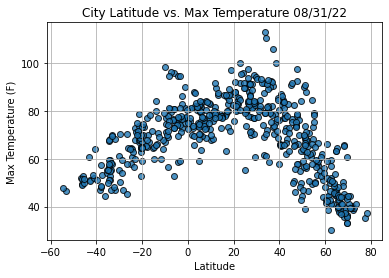

In [13]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

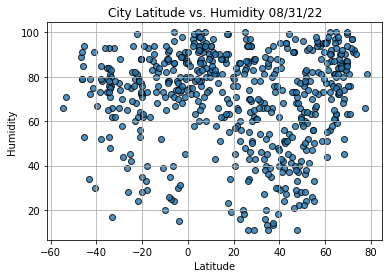

In [14]:
# Build the scatter plot for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

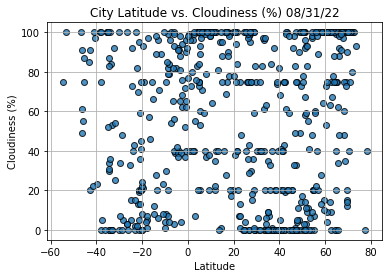

In [15]:
# Build the scatter plot for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

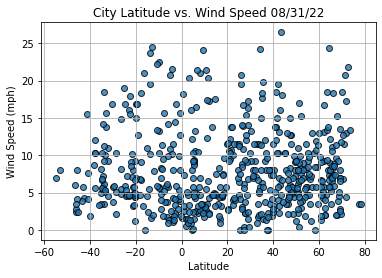

In [16]:
# Build the scatter plot for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [17]:
!jupyter nbextension enable --py gmaps

# in case I run into gmap issues

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: OK


In [46]:
# Import linregress

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()
    

In [34]:
index13 = city_data_df.loc[13]
index13

City                    Thinadhoo
Country                        MV
Date          2022-08-31 20:31:56
Lat                        0.5333
Lng                       72.9333
Max Temp                    80.92
Humidity                       75
Cloudiness                     99
Wind Speed                  18.25
Name: 13, dtype: object

In [20]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

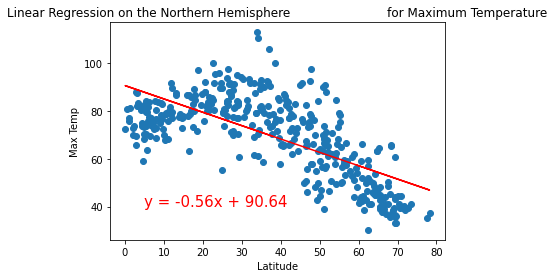

-0.6933379471239643


In [52]:
#  Linear regression on the Northern Hemisphere

x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Max Temp']



plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp', (5,40))

result = linregress(x_values, y_values)
print(result.rvalue)

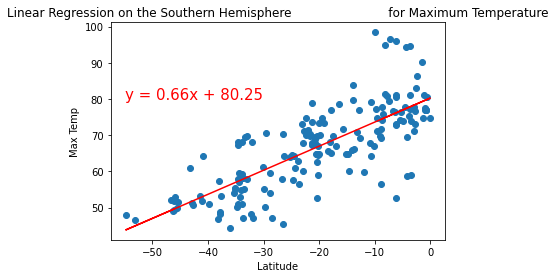

0.767691822225449


In [53]:
#  Linear regression on the Northern Hemisphere

x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Max Temp']

# Call the function

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp', (-55,80))

result = linregress(x_values, y_values)
print(result.rvalue)

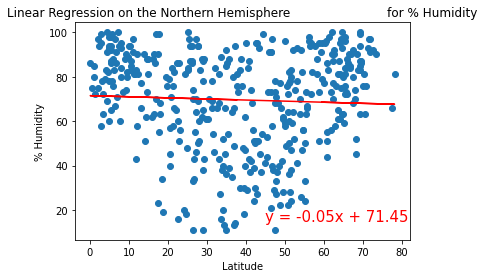

-0.04629206537160287


In [54]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,15))

result = linregress(x_values, y_values)
print(result.rvalue)

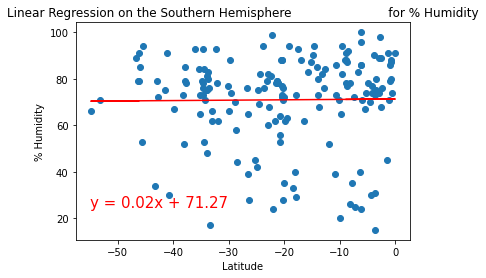

0.011429935664621473


In [55]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,25))

result = linregress(x_values, y_values)
print(result.rvalue)

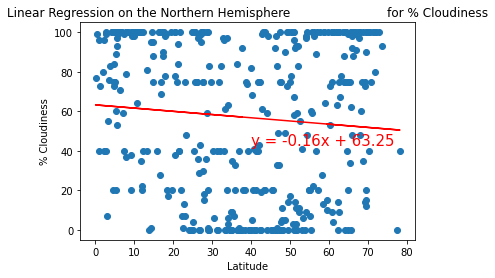

-0.08778057666228854


In [56]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,43))

result = linregress(x_values, y_values)
print(result.rvalue)

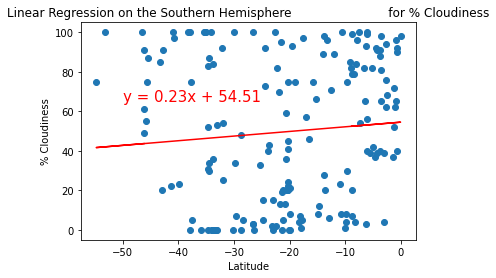

0.08673074354863237


In [57]:
# Linear regression on the Northern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,65))

result = linregress(x_values, y_values)
print(result.rvalue)

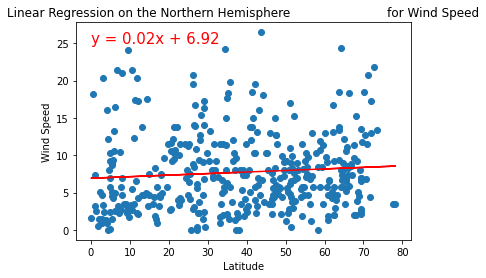

0.08550893730497568


In [58]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,25))

result = linregress(x_values, y_values)
print(result.rvalue)

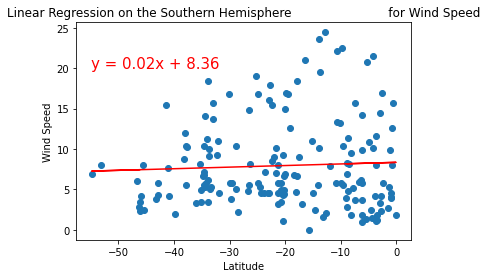

0.049736409740112175


In [59]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,20))

result = linregress(x_values, y_values)
print(result.rvalue)